In [528]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# load data


In [529]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import folium

# for ML:
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# import eli5 # Feature importance evaluation

In [530]:
# df = pd.read_csv('/content/drive/MyDrive/527/hotel_bookings.csv') #for Leting Sun
df = pd.read_csv('/content/drive/MyDrive/hotel_bookings.csv') # For Ken

In [531]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# getting data information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# data cleaning


In [ ]:
nullArray = df.isnull().sum()
nullArray = nullArray[nullArray > 0]
print(nullArray)

children         4
country        488
agent        16340
company     112593
dtype: int64


In [533]:
df_null = df.isnull().sum()/len(df)*100
df_null = df_null[df_null>0]
df_null

country     0.408744
agent      13.686238
company    94.306893
dtype: float64

In [532]:
#filling children,since most booking has zero children ,so we fill children as 0
print(df['children'].value_counts())
df['children'].fillna(0, inplace=True)

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64


In [ ]:
#df['country'].value_counts() since there are 177 different country values, it is not ideal to assgin null to any one of them
df['country'].fillna('unknown', inplace=True)

In [ ]:
print("the null rate of company roll is ",1-df['company'].count()/df['company'].size,'so we decide to delete this category')
df.drop('company', axis=1, inplace=True)

the null rate of company roll is  0.943068933746545 so we decide to delete this category


In [ ]:
#probably booking with people themselves，so replace null with new category 0X
df['agent'].fillna(0.0, inplace=True)

In [ ]:
#data description says sc = undefined
df["meal"].replace("Undefined", "SC", inplace=True)

In [ ]:
noAdults = df.loc[df["adults"]==0].index
df.drop(df.index[noAdults], inplace=True)

In [ ]:
# There is no null value now
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [ ]:
df.shape

(118987, 31)

In [ ]:
# Original DataFrame has 119390 entries. We eliminated 403 rows.

In [ ]:
119390 - 118987

403

In [ ]:
# Remove duplicate entries

df.duplicated().sum()

31983

In [ ]:
df[df.duplicated()].head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,1,No Deposit,250.0,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,0,No Deposit,250.0,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,0,No Deposit,240.0,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,0,No Deposit,240.0,0,Transient,109.80,0,3,Check-Out,2015-07-08


Check the types of variables in our dataset


In [ ]:
Categorical_Var_list = []
for i in df.columns:
  if df[i].dtypes == 'object':
    Categorical_Var_list.append(i)
print(Categorical_Var_list) 
len(Categorical_Var_list)

['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']


12

### Note that 'agent' is also a categorical variable. But it is already encoded since this column is the ID of the agent

**There are 12 categorical variables**

In [ ]:
# Check the value in these 12 categorical variables
for i in Categorical_Var_list:
  print(i)
  print(df[i].value_counts())
  print('-----------------------')


hotel
City Hotel      78940
Resort Hotel    40047
Name: hotel, dtype: int64
-----------------------
arrival_date_month
August       13829
July         12611
May          11764
October      11131
April        11057
June         10917
September    10489
March         9751
February      8034
November      6765
December      6736
January       5903
Name: arrival_date_month, dtype: int64
-----------------------
meal
BB    92020
HB    14454
SC    11715
FB      798
Name: meal, dtype: int64
-----------------------
country
PRT        48440
GBR        12105
FRA        10376
ESP         8546
DEU         7271
ITA         3752
IRL         3370
BEL         2326
BRA         2212
NLD         2094
USA         2085
CHE         1717
CN          1279
AUT         1260
SWE         1017
CHN          998
POL          915
ISR          668
RUS          626
NOR          606
ROU          497
unknown      478
FIN          444
DNK          430
AUS          426
AGO          362
LUX          285
MAR          256
TUR 

**All these 12 categorical variables are not ordinal except reservation_status_date**

# decriptive analysis


In [ ]:
#we want to know the information of the guest that actually visited
visited = df.loc[df['is_canceled'] == 0]
visited.shape

(74872, 31)

In [ ]:
visited.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Overall Cancellation

<Axes: xlabel='is_canceled', ylabel='count'>

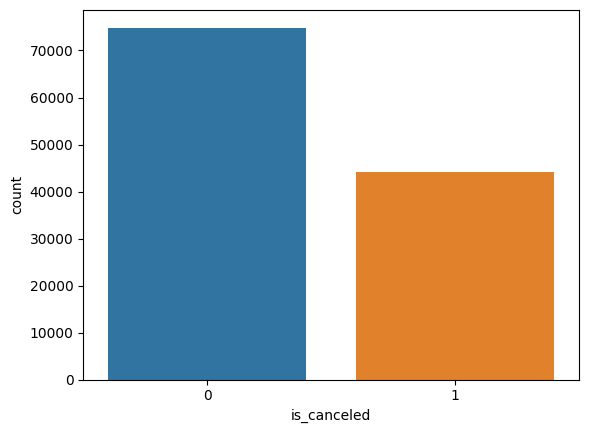

In [ ]:
sns.countplot( x = 'is_canceled', data = df)

Cancellation Groupby hotel Type

<Axes: xlabel='hotel', ylabel='count'>

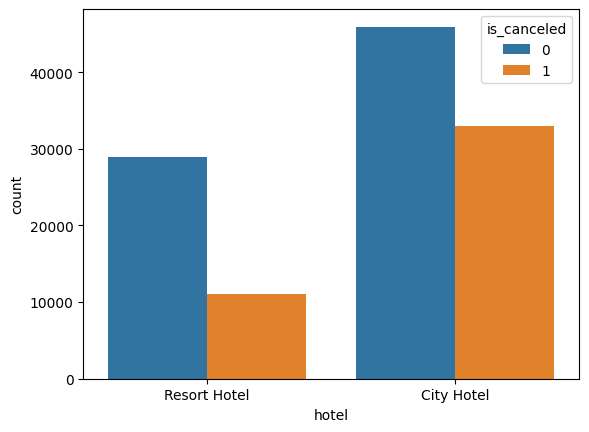

In [ ]:
sns.countplot(x = 'hotel',hue = 'is_canceled', data = df)

In [ ]:
df.groupby('hotel')['is_canceled'].value_counts()

hotel         is_canceled
City Hotel    0              45945
              1              32995
Resort Hotel  0              28927
              1              11120
Name: is_canceled, dtype: int64

City Hotel has higher proportion of cancellation

Question 1: what is the top overall travel season?

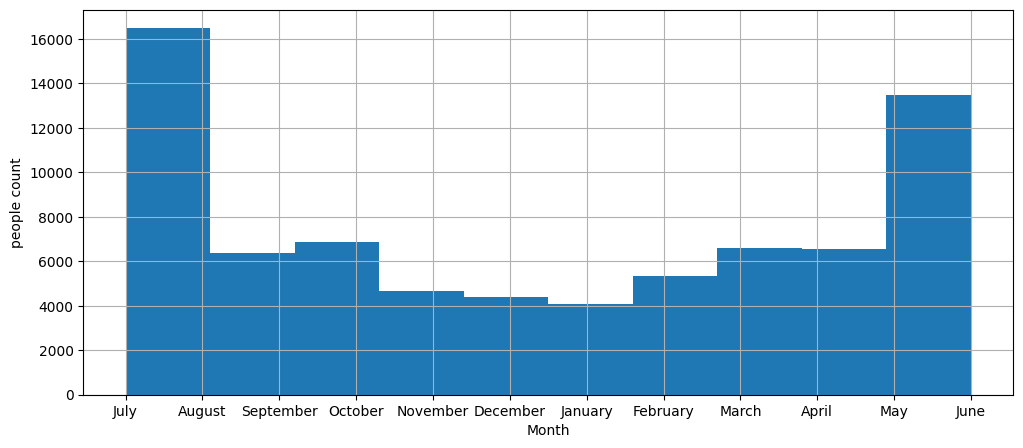

In [ ]:
fig = plt.figure(figsize=(12, 5))
visited['arrival_date_month'].hist()
plt.xlabel('Month')
plt.ylabel('people count')
plt.show()

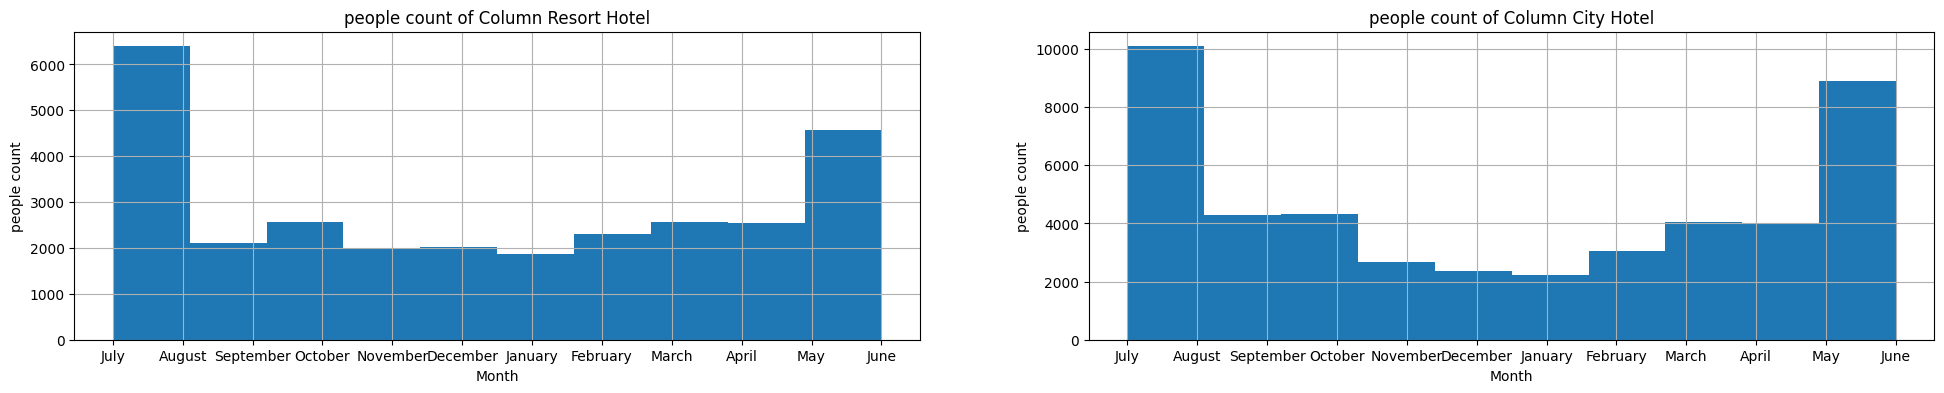

In [ ]:
hotel_type = visited['hotel'].unique()
fig, axes = plt.subplots(nrows=1, ncols=len(hotel_type), figsize=(24, 4))
for i,value in enumerate(hotel_type):
  visited.loc[visited['hotel'] == value]['arrival_date_month'].hist(ax=axes[i])
  axes[i].set_title('people count of Column {}'.format(value))
  axes[i].set_xlabel('Month')
  axes[i].set_ylabel('people count')

what kind of the hotel does people with most likely to go?


In [ ]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
visited['hotel'].value_counts()

City Hotel      45945
Resort Hotel    28927
Name: hotel, dtype: int64

<Axes: xlabel='hotel', ylabel='count'>

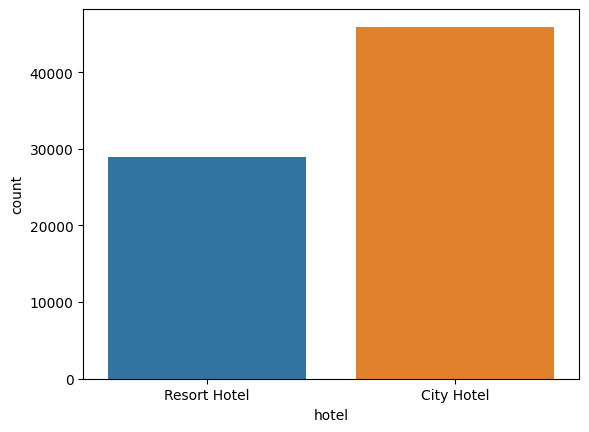

In [ ]:
sns.countplot( x = 'hotel', data = visited)

what kind of the hotel does people with children most likely to go?

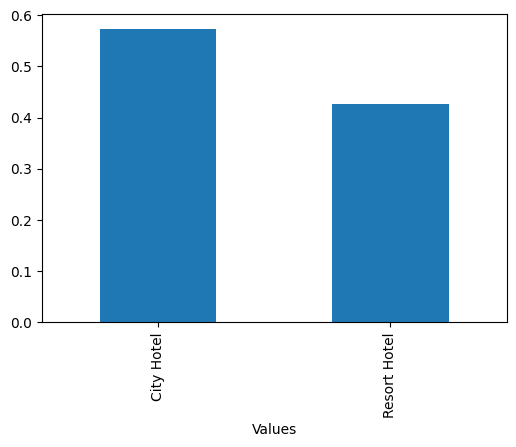

In [ ]:
withBaby = visited.loc[visited['children']+ visited['babies'] >0]
fig = plt.figure(figsize=(6, 4))
hotelPreferRate = withBaby['hotel'].value_counts(normalize = True)
ax = hotelPreferRate.plot(kind = 'bar')
ax.set_xlabel('Values', rotation=0)
plt.show()

should hotel prepare more children stuff in specific month?

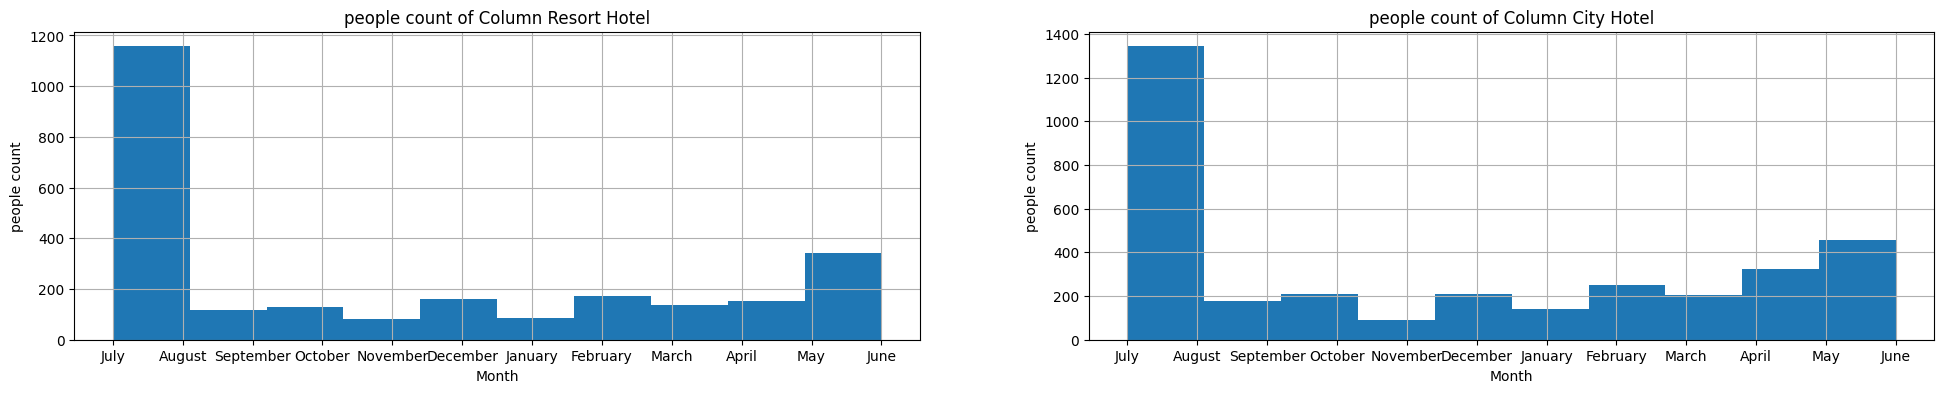

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=len(hotel_type), figsize=(24, 4))
for i,value in enumerate(withBaby['hotel'].unique()):
  withBaby.loc[withBaby['hotel'] == value]['arrival_date_month'].hist(ax=axes[i])
  axes[i].set_title('people count of Column {}'.format(value))
  axes[i].set_xlabel('Month')
  axes[i].set_ylabel('people count')

does specific year affect which month people want to travel?

In [ ]:
from pandas.core.base import value_counts
fig = plt.figure(figsize=(12, 5))
visited.groupby('arrival_date_year')['arrival_date_month'].value_counts()

arrival_date_year  arrival_date_month
2015               October               3218
                   September             3016
                   August                2281
                   December              1935
                   November              1851
                   July                  1515
2016               October               3669
                   May                   3554
                   September             3365
                   April                 3359
                   March                 3337
                   August                3214
                   June                  3188
                   July                  3053
                   November              2799
                   February              2539
                   December              2442
                   January               1683
2017               May                   3541
                   July                  3316
                   March                 3

<Figure size 1200x500 with 0 Axes>

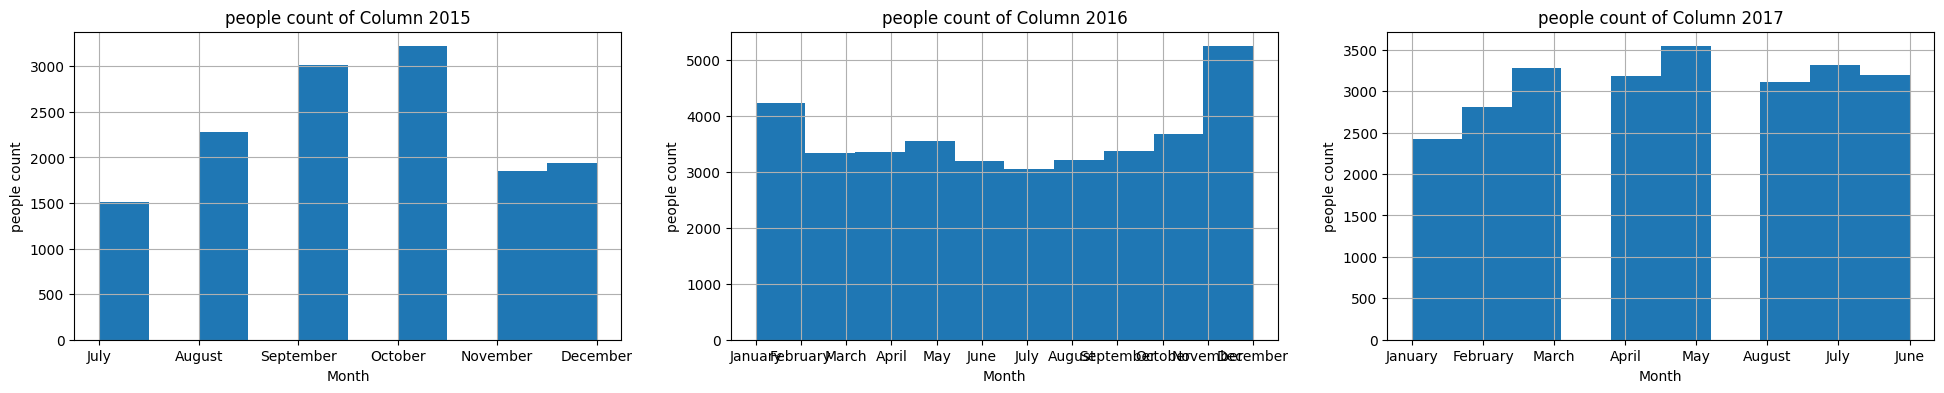

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 4))
for i,value in enumerate(visited['arrival_date_year'].unique()):
  visited.loc[visited['arrival_date_year'] == value]['arrival_date_month'].hist(ax=axes[i])
  axes[i].set_title('people count of Column {}'.format(value))
  axes[i].set_xlabel('Month')
  axes[i].set_ylabel('people count')

does people prefer to arrive at particular day?

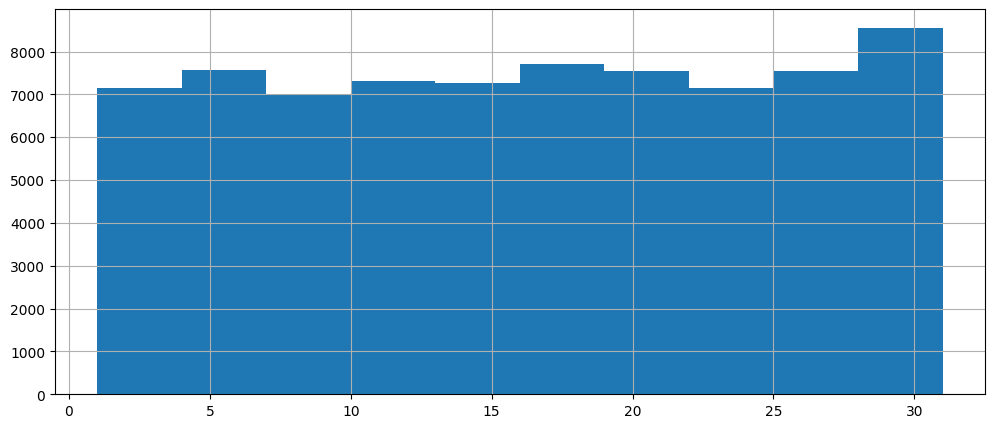

In [ ]:
fig = plt.figure(figsize=(12, 5))
visited['arrival_date_day_of_month'].hist()
# plt.xlabel('Month')
# plt.ylabel('people count')
plt.show()

which country is more porpular? 

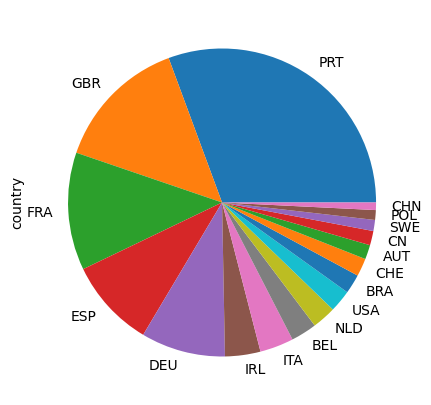

In [ ]:
s = visited['country'].value_counts()>500
idx = s[s.array == True].index
porpularCountries = visited[visited['country'].isin(idx)]['country'].value_counts()
# print(porpularCountries)
fig = plt.figure(figsize=(12, 5))
ax = porpularCountries.plot(kind = 'pie')
plt.show()

what month does people typicaly come in

<function matplotlib.pyplot.show(close=None, block=None)>

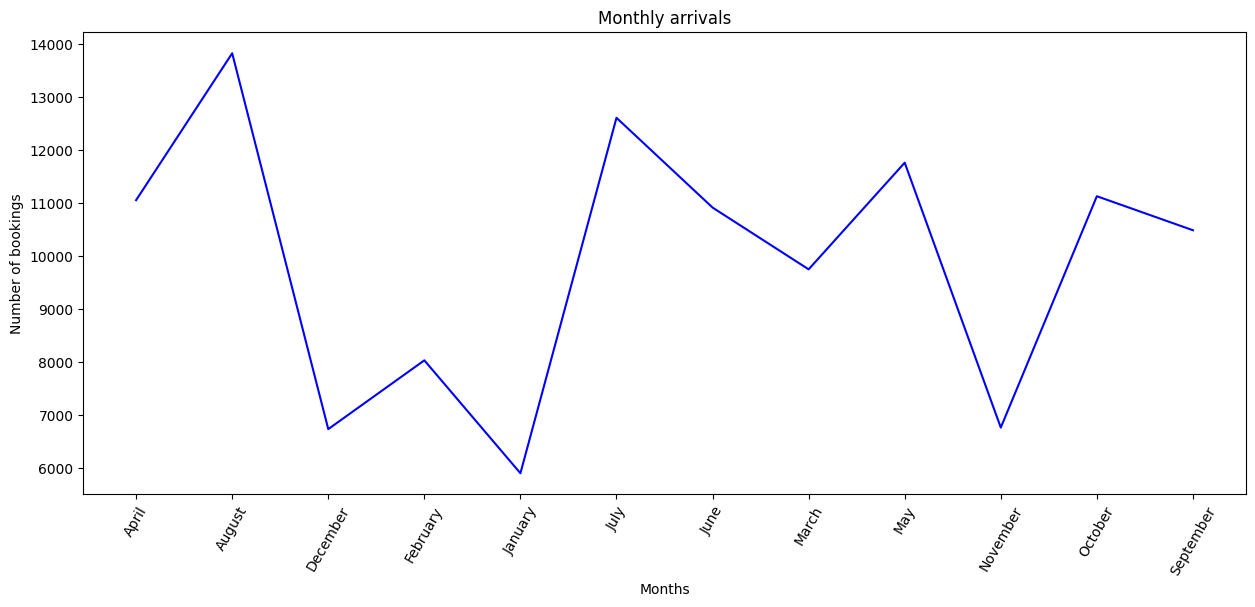

In [ ]:
df_year = df.groupby(['arrival_date_month']).agg({'hotel':'count'}).reset_index()

plt.figure(figsize=(15,6))
sns.lineplot(x = "arrival_date_month",y = 'hotel', data = df_year, color = 'blue' )
plt.xticks(rotation = 60)
plt.title('Monthly arrivals', )
plt.xlabel('Months')
plt.ylabel('Number of bookings')
plt.show

See the Length of Stay

In [ ]:
df['total_stayNights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

Text(0, 0.5, 'No. of Bookings')

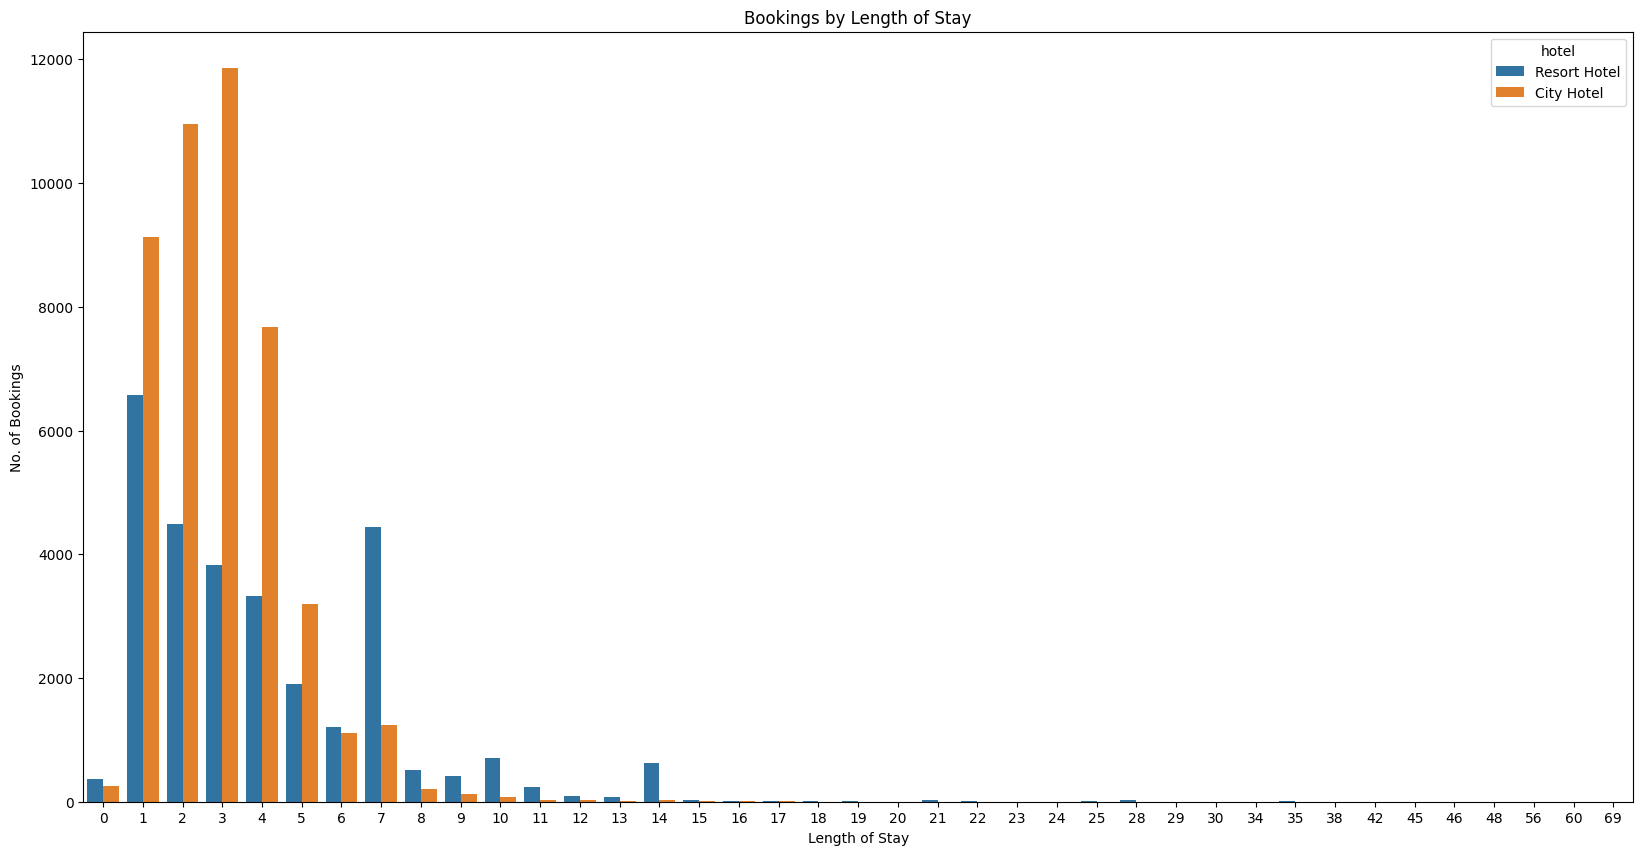

In [ ]:
fig = plt.figure(figsize = (20,10))
sns.countplot(x = 'total_stayNights', data = df.loc[df['is_canceled'] == 0], hue = 'hotel')
plt.title('Bookings by Length of Stay')
plt.xlabel('Length of Stay')
plt.ylabel('No. of Bookings')

## **Outlier Detection**

To preserve the dataset, we create a copy for our original dataset 'df' as 'df1

In [ ]:
df1 = df.copy()
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stayNights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


In [ ]:
df1['is_repeated_guest'].value_counts()

0    115233
1      3754
Name: is_repeated_guest, dtype: int64

Combine Children and Babies into a new feature called 'Youngster' 

In [ ]:
df1['Youngster'] = df1['children'] + df1['babies']

In [ ]:
# Drop these 4 features since they are already combined into 2 features
df1 = df1.drop(['children', 'babies', 'stays_in_weekend_nights','stays_in_week_nights'], axis=1)

In [ ]:
df1.shape

(118987, 29)

In [ ]:
# First we need to find out which features are numeric

In [ ]:
numeric_Var_list = []
for i in df1.columns:
  if df1[i].dtypes == 'int64' or df1[i].dtypes == 'float64':
    numeric_Var_list.append(i)
print(numeric_Var_list) 
len(numeric_Var_list)

['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'adults', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'total_stayNights', 'Youngster']


17

We need to remove **'is_canceled' **the target variable,  and **'agent'** which was already deleted in previous steps


In [ ]:
numeric_Var_list.remove('is_canceled')
numeric_Var_list.remove('agent')

In [ ]:
df1 = df1.drop(['agent'], axis=1)

In [ ]:
len(numeric_Var_list) # Now we have 15 variables as numeric features, and we need to detect each of its outliers

15

In [ ]:
numeric_Var_list

['lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'adults',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'total_stayNights',
 'Youngster']

We examine each one of the numeric feature before we decide to apply any method to detect outliers. We will use box plot and histogram to examine these features. Features we could ignore includes 'arrival_date_year',
 'arrival_date_week_number' and 'arrival_date_day_of_month' as they are all valid input

In [ ]:
numeric_Var_list_Outliers = numeric_Var_list
numeric_Var_list_Outliers.remove('arrival_date_year')
numeric_Var_list_Outliers.remove('arrival_date_week_number')
numeric_Var_list_Outliers.remove('arrival_date_day_of_month')

In [ ]:
# We need to remove "is_repeated_guest" since it is a binary categorical variable
numeric_Var_list_Outliers.remove('is_repeated_guest')

In [ ]:
numeric_Var_list_Outliers

['lead_time',
 'adults',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'total_stayNights',
 'Youngster']

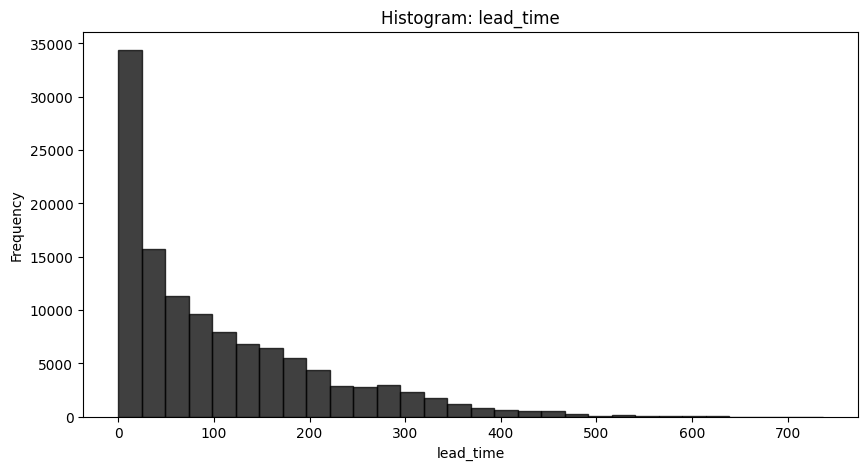

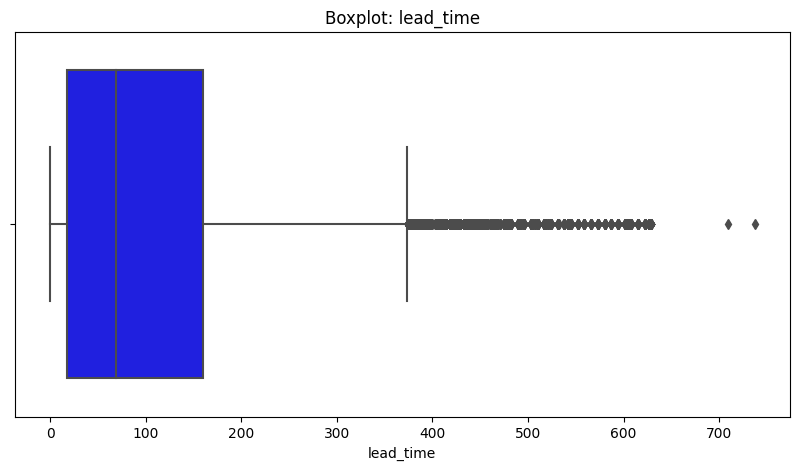

The min value is 0
The median value is 69.0
The mean value is 104.07053711750024
The max value is 737


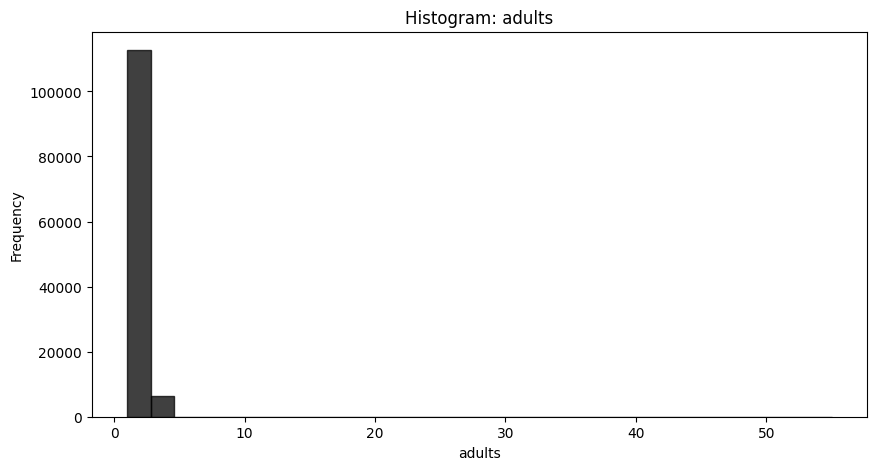

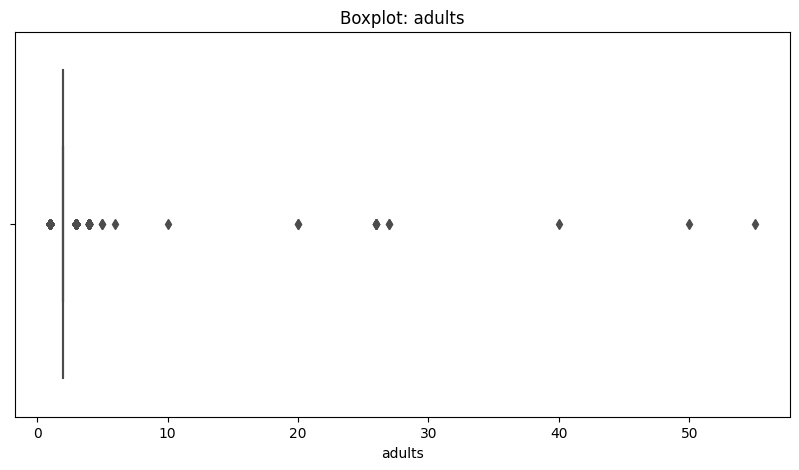

The min value is 1
The median value is 2.0
The mean value is 1.8626908821972148
The max value is 55


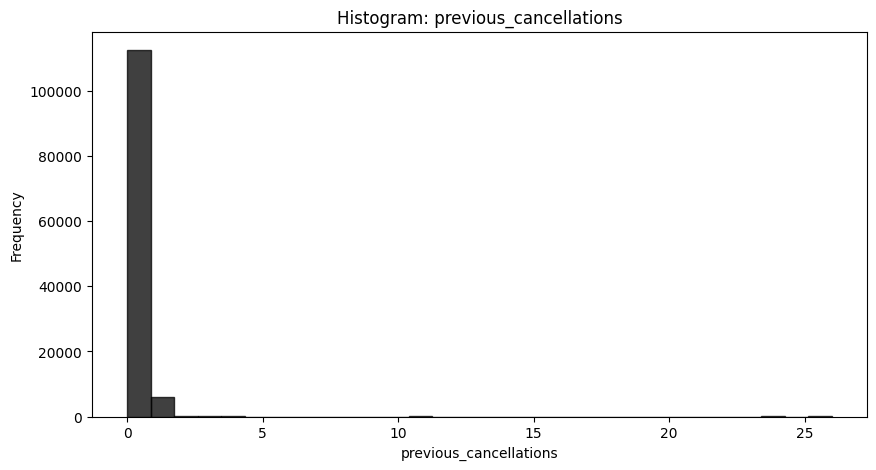

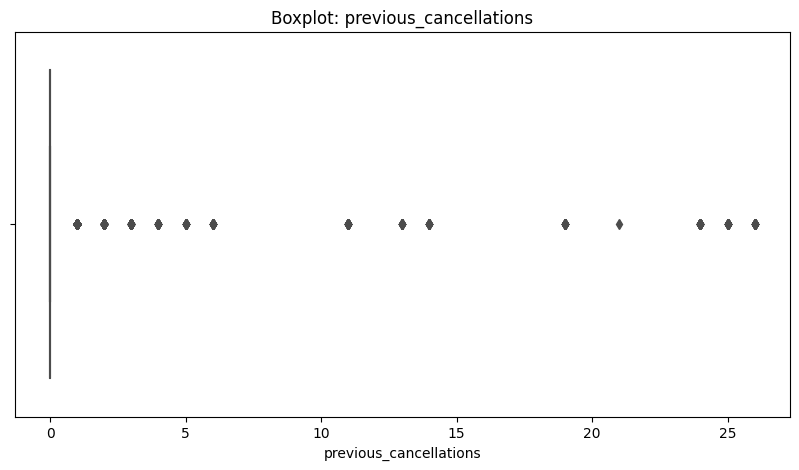

The min value is 0
The median value is 0.0
The mean value is 0.08733727213897316
The max value is 26


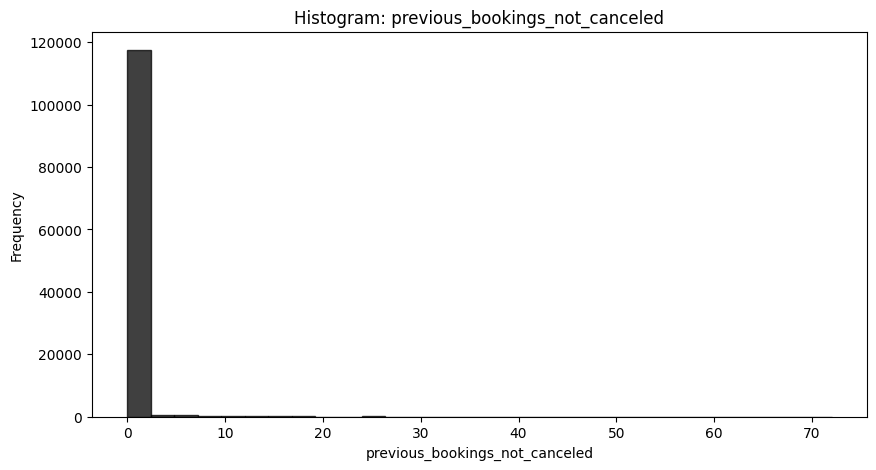

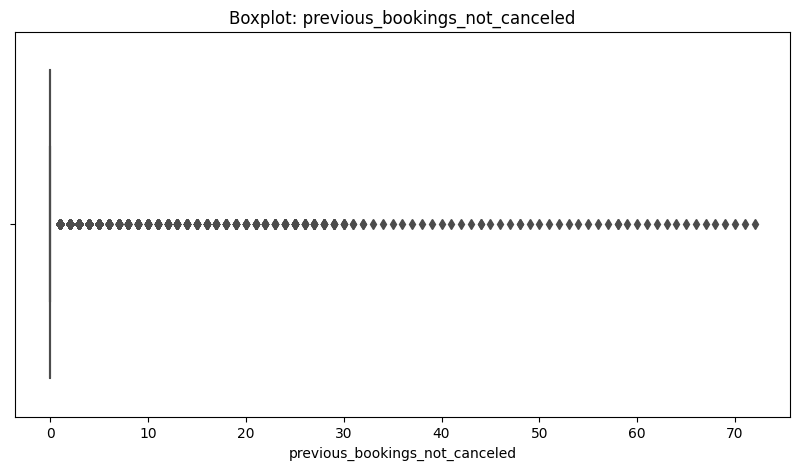

The min value is 0
The median value is 0.0
The mean value is 0.13734273492062157
The max value is 72


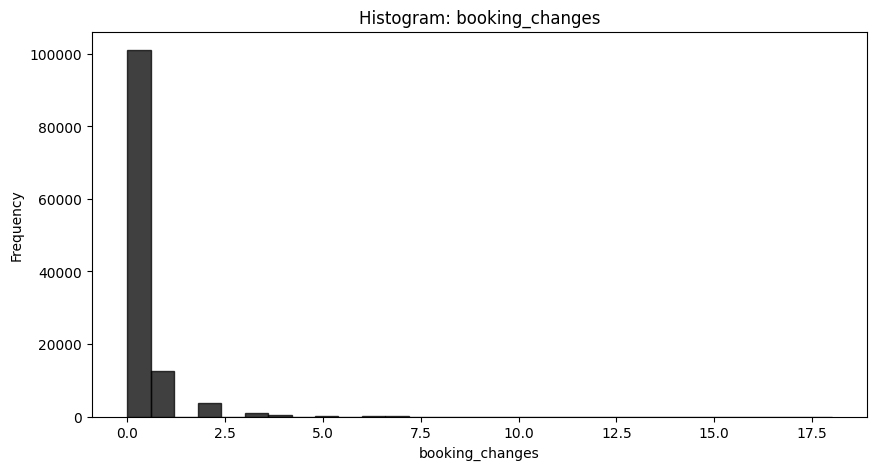

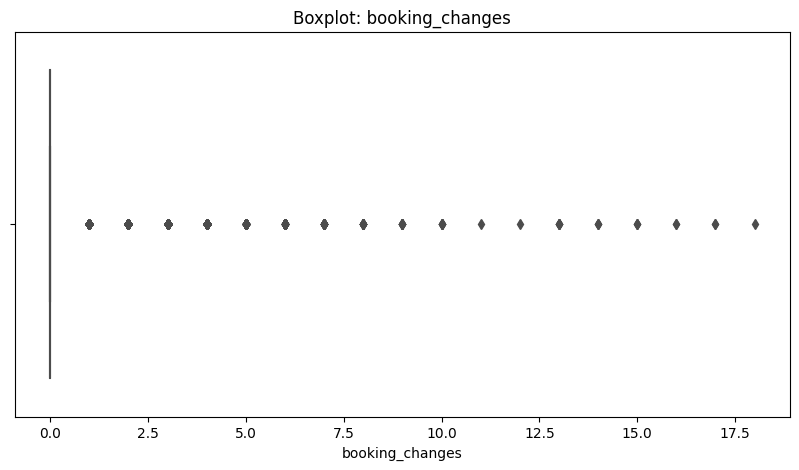

The min value is 0
The median value is 0.0
The mean value is 0.21852807449553313
The max value is 18


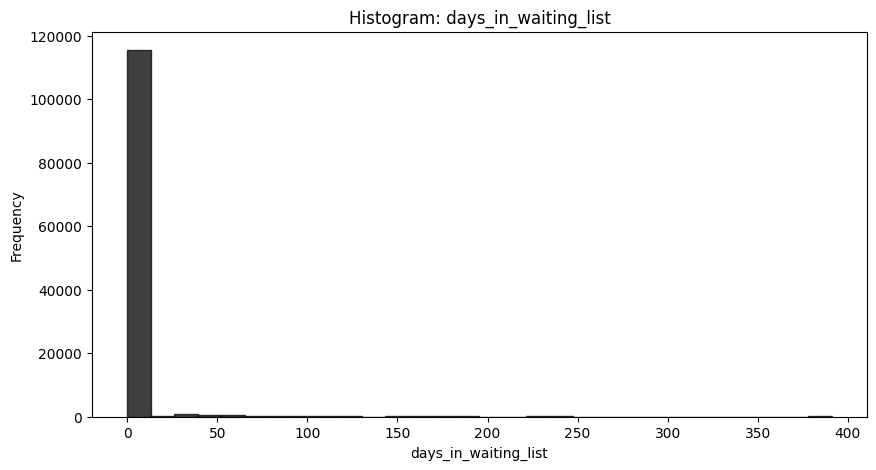

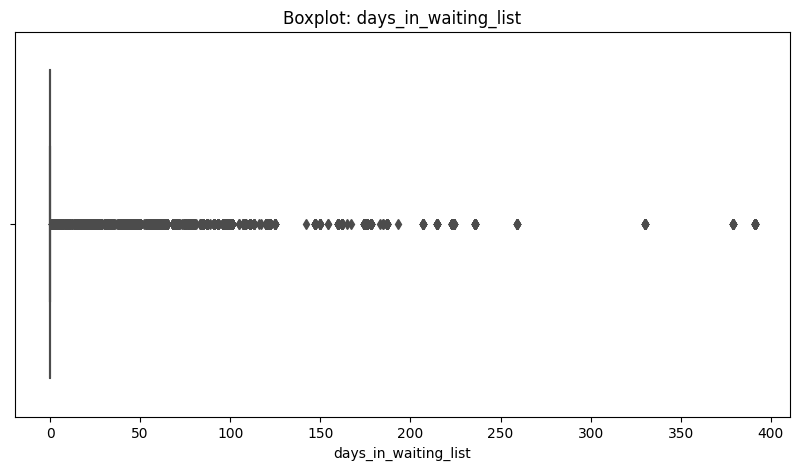

The min value is 0
The median value is 0.0
The mean value is 2.325564977686638
The max value is 391


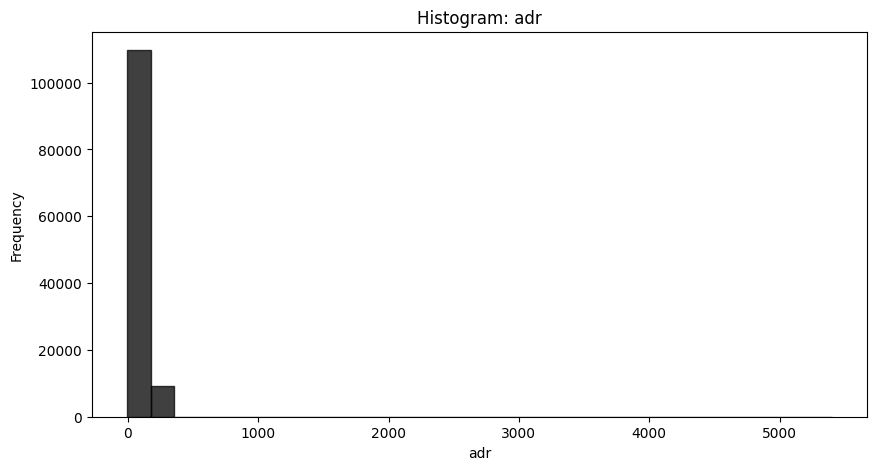

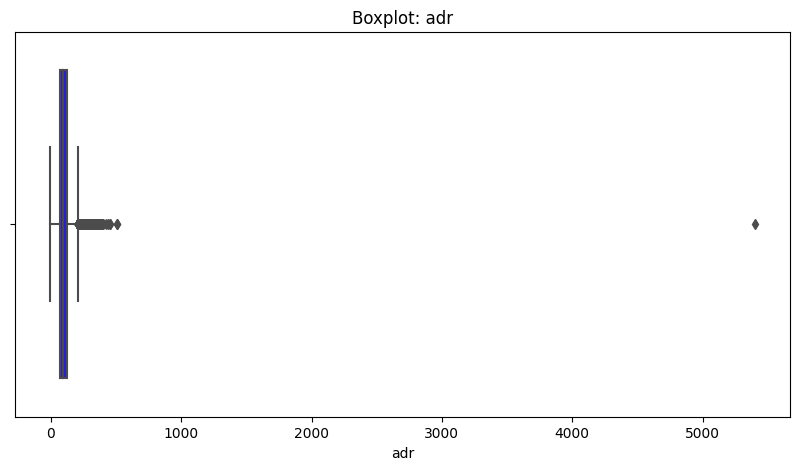

The min value is -6.38
The median value is 95.0
The mean value is 102.00807584021784
The max value is 5400.0


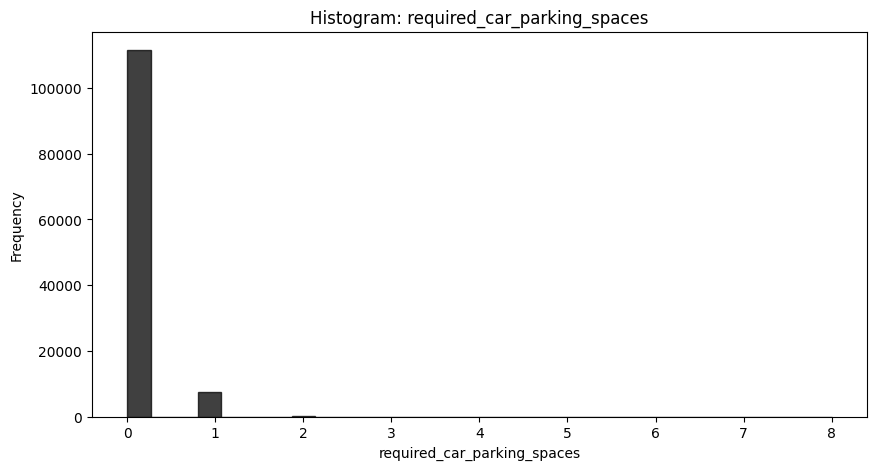

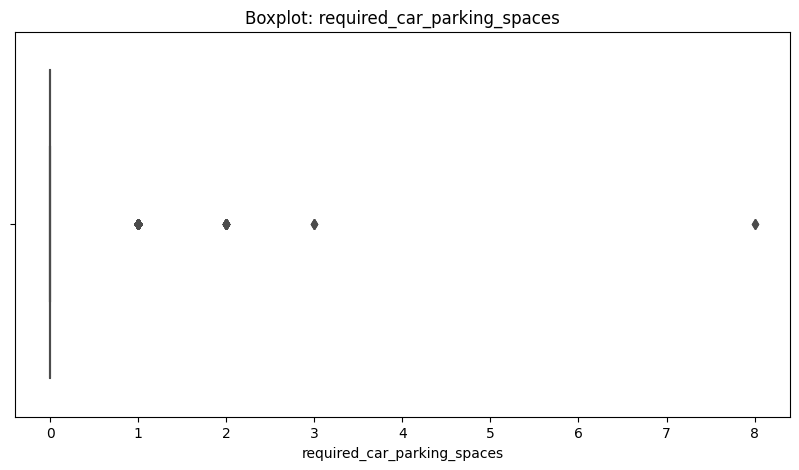

The min value is 0
The median value is 0.0
The mean value is 0.06265390336759478
The max value is 8


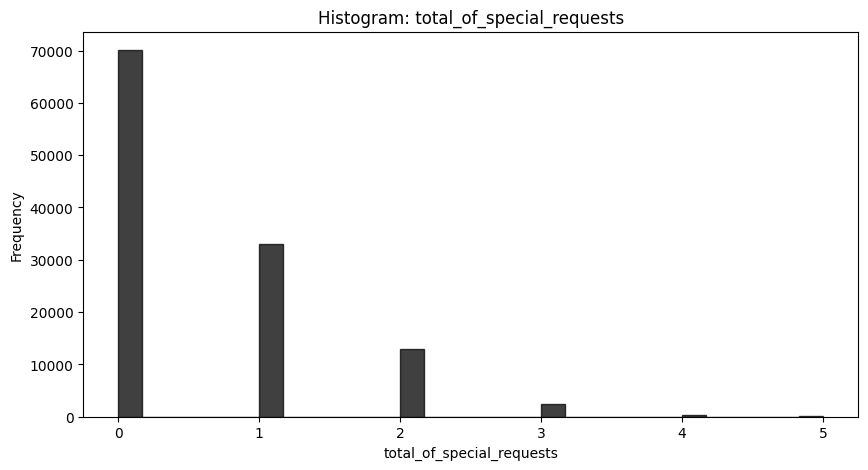

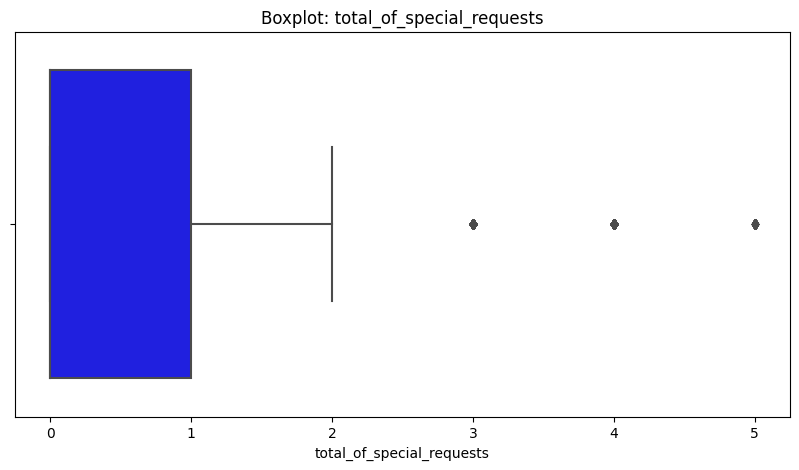

The min value is 0
The median value is 0.0
The mean value is 0.5706421709934699
The max value is 5


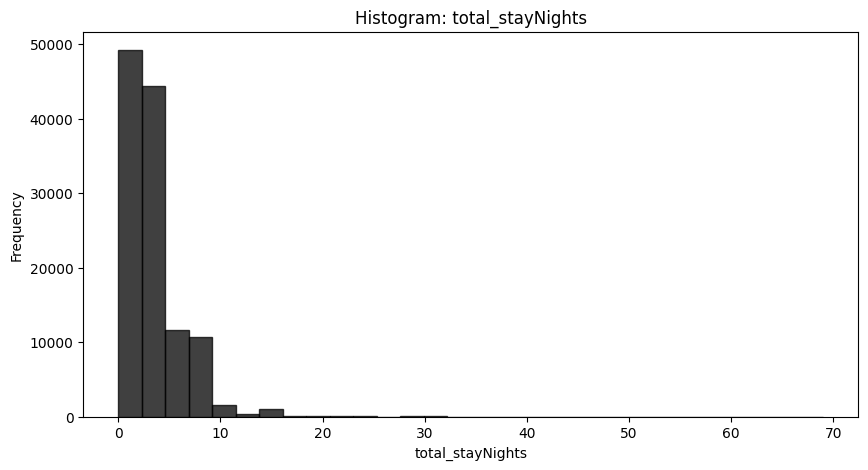

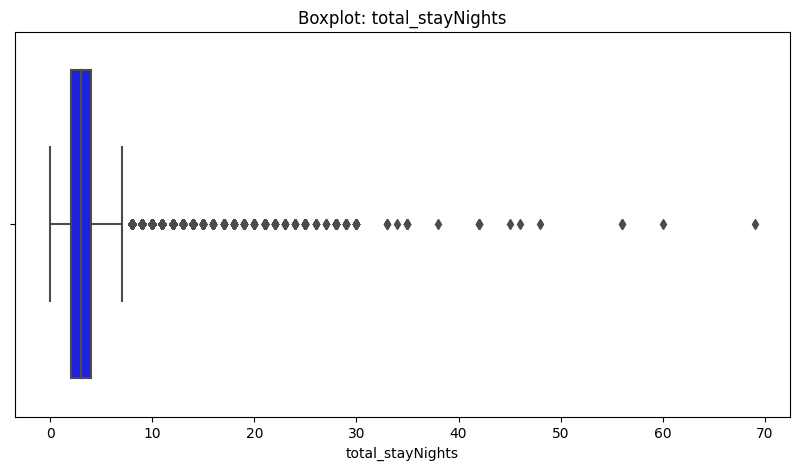

The min value is 0
The median value is 3.0
The mean value is 3.42599611722289
The max value is 69


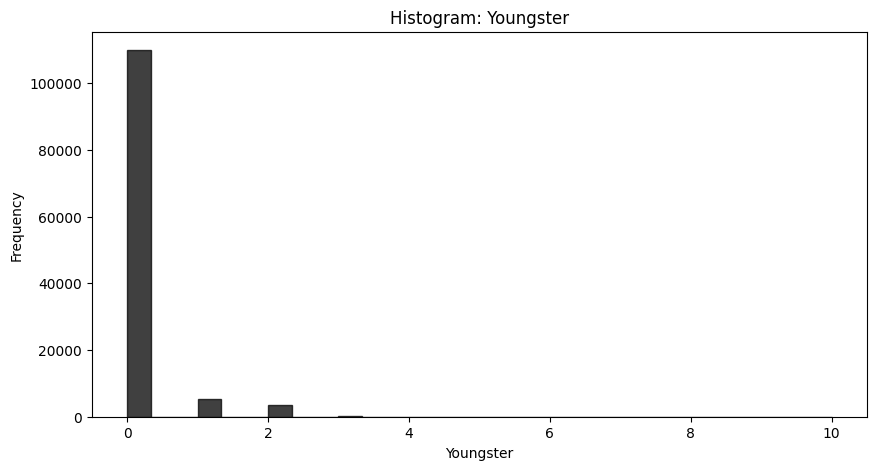

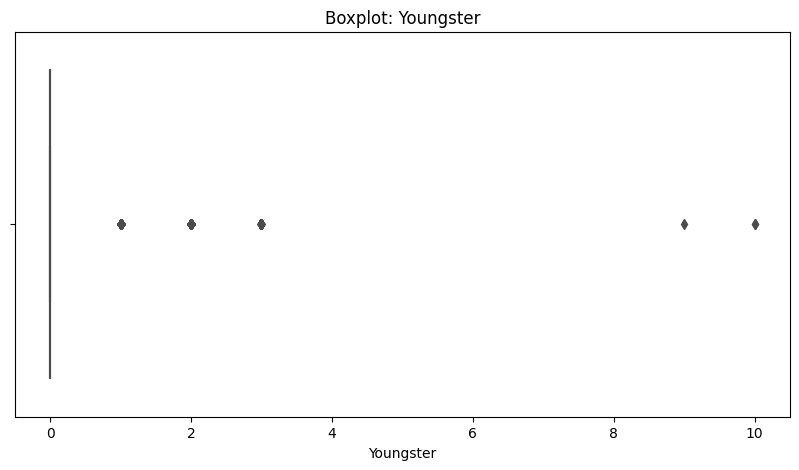

The min value is 0.0
The median value is 0.0
The mean value is 0.108381587904561
The max value is 10.0


In [ ]:
# Create a loop to check histogram for all numeric features
for features in numeric_Var_list_Outliers:
# Histogram
  plt.figure(figsize=(10, 5))
  plt.hist(df1[features], bins=30, alpha=0.75, color='black', edgecolor='black')
  plt.xlabel(features)  # Change the x label according to the current feature
  plt.ylabel('Frequency')
  plt.title(f'Histogram: {features}')  # Add title according to the current feature
  plt.show()

# Boxplot
  plt.figure(figsize=(10, 5))
  sns.boxplot(x=df1[features], color='blue')
  plt.title(f'Boxplot: {features}') 
  plt.xlabel(features)
  plt.show()

# Calculate the min, median, mean, max for each numeric feature
  min_value = df1[features].min()
  max_value = df1[features].max()
  median_value = df1[features].median()
  mean_value = df1[features].mean()
  print('The min value is ' + str(min_value))
  print('The median value is ' + str(median_value))
  print('The mean value is ' + str(mean_value))
  print('The max value is ' + str(max_value))


We determine the 2 right-most points in lead_time that are further from the rest are outliers. 

3 outliers in days_in_waiting_list

1 outliers in adr

In [ ]:
# Drop 2 max values from lead_time as outliers
max_indices = df1.nlargest(2, 'lead_time').index

# Drop the rows with those indices
df1 = df1.drop(max_indices)

# Reset the index if needed
df1.reset_index(drop=True, inplace=True)

In [ ]:
# Drop 3 max values from days_in_waiting_list as outliers
max_indices2 = df1.nlargest(3, 'days_in_waiting_list').index

# Drop the rows with those indices
df1 = df1.drop(max_indices2)

# Reset the index if needed
df1.reset_index(drop=True, inplace=True)

In [ ]:
# Drop the max values from adr as outliers
max_indices3 = df1.nlargest(1, 'adr').index

# Drop the rows with those indices
df1 = df1.drop(max_indices3)

# Reset the index if needed
df1.reset_index(drop=True, inplace=True)

In [ ]:
df1.shape[0]
# we see that there are now 118981 rows compare to 118987 rows originally

118981

After some initial visual inspection throught the plot above, we can see that there is no outliers in the following **3** numeric features: 
**Youngster, total_of_special_requests, required_car_parking_spaces**

There is negative value in adr - Average Daily Rate


# **Feature Engineering**

Among the 12 categorical variables, we use label encoding to 'reservation_status_date' and 'arrival_date_month' since they are ordinal variables, and hash encoding/One-hot encoding to the rest. 
Since 'country' has a really high cardinality - 178 values, we decide to drop this feature.

To preserve the dataset, we create a copy for our original dataset 'df' as 'df1' to do feature engineering

In [ ]:
# 13 categorical features in total
# But only 12 in our list since "is_repeated_guest" are already encoded
Categorical_Var_list

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [ ]:
# Check the value in these 12 categorical variables
for i in Categorical_Var_list:
  print(i)
  print(df1[i].value_counts())
  print('-----------------------')


hotel
City Hotel      78936
Resort Hotel    40045
Name: hotel, dtype: int64
-----------------------
arrival_date_month
August       13829
July         12610
May          11764
October      11128
April        11057
June         10917
September    10489
March         9750
February      8033
November      6765
December      6736
January       5903
Name: arrival_date_month, dtype: int64
-----------------------
meal
BB    92015
HB    14453
SC    11715
FB      798
Name: meal, dtype: int64
-----------------------
country
PRT        48435
GBR        12104
FRA        10376
ESP         8546
DEU         7271
ITA         3752
IRL         3370
BEL         2326
BRA         2212
NLD         2094
USA         2085
CHE         1717
CN          1279
AUT         1260
SWE         1017
CHN          998
POL          915
ISR          668
RUS          626
NOR          606
ROU          497
unknown      478
FIN          444
DNK          430
AUS          426
AGO          362
LUX          285
MAR          256
TUR 

For variables with low cardinalities, we apply one-hot encoding
The following 6 variables are: hotel, meal, reservation_status, customer_type, deposit_type, distribution_channel

For variables with high cardinalities, we apply feature hashing accrodingly

In [ ]:
# Set to display all rows
pd.set_option('display.max_rows', None)

df['country'].value_counts()
#df['country'].nunique()

PRT        48440
GBR        12105
FRA        10376
ESP         8546
DEU         7271
ITA         3752
IRL         3370
BEL         2326
BRA         2212
NLD         2094
USA         2085
CHE         1717
CN          1279
AUT         1260
SWE         1017
CHN          998
POL          915
ISR          668
RUS          626
NOR          606
ROU          497
unknown      478
FIN          444
DNK          430
AUS          426
AGO          362
LUX          285
MAR          256
TUR          247
HUN          228
ARG          213
JPN          197
CZE          171
IND          150
KOR          132
GRC          128
DZA          103
SRB          101
HRV          100
MEX           84
EST           83
IRN           82
LTU           81
ZAF           79
BGR           75
NZL           74
COL           71
UKR           68
MOZ           67
SVK           65
CHL           64
THA           58
ISL           57
SVN           56
LVA           55
CYP           51
TWN           51
ARE           50
SAU           

We decided to hash the above variable using ISO country mapping

In [ ]:
df['market_segment'].value_counts()

Online TA        56221
Offline TA/TO    24179
Groups           19791
Direct           12553
Corporate         5282
Complementary      724
Aviation           235
Undefined            2
Name: market_segment, dtype: int64

In [ ]:
df1['reserved_room_type'].value_counts() # 11 categories

A    85859
D    19178
E     6517
F     2892
G     2091
C      930
B      907
H      601
L        6
Name: reserved_room_type, dtype: int64

In [ ]:
# Replace "L" with the mode category "A" to avoid noise due to that single data point
mode_category2 = df1['reserved_room_type'].mode().iloc[0]
df1['reserved_room_type'].replace('L', mode_category2, inplace=True)
df1['reserved_room_type'].value_counts() # 10 categories now 

A    85865
D    19178
E     6517
F     2892
G     2091
C      930
B      907
H      601
Name: reserved_room_type, dtype: int64

In [ ]:
df1['assigned_room_type'].value_counts() # 11 categories

A    73979
D    25306
E     7797
F     3751
G     2548
C     2369
B     1972
H      712
I      359
K      187
L        1
Name: assigned_room_type, dtype: int64

In [ ]:
# Replace "L" with the mode category "A" to avoid noise due to that single data point
mode_category = df1['assigned_room_type'].mode().iloc[0]
df1['assigned_room_type'].replace('L', mode_category, inplace=True)
df1['assigned_room_type'].value_counts() # 10 categories now 

A    73980
D    25306
E     7797
F     3751
G     2548
C     2369
B     1972
H      712
I      359
K      187
Name: assigned_room_type, dtype: int64

The above variable could also be used with one-hot encoding

In [ ]:
# Apply label encoding to arrival_date_month and reservation_status_date
df1['reservation_status_date']=LabelEncoder().fit_transform(df1['reservation_status_date'])
df1['arrival_date_month']=LabelEncoder().fit_transform(df1['arrival_date_month'])

In [ ]:
#Intall pycountry-convert package to Apply feature hashing with ISO country mapping to variable "country"
!pip install pycountry-convert
import pycountry_convert as pc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Apply feature hashing with ISO country mapping to variable "country"

# Function to convert ISO country code to continent code
def country_to_continent(country_code):
    try:
        # Get the 2-letter country code (alpha_2) from the 3-letter country code (alpha_3)
        country_alpha2 = pc.country_alpha3_to_country_alpha2(country_code)

        # Convert the 2-letter country code to the continent code
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)

        return continent_code
    except KeyError:
        # If the country code is not found, return 'Unknown'
        return 'Unknown'

# Apply the mapping function to the 'country' column to create a new 'continent' column
df1['continent'] = df1['country'].apply(country_to_continent)

# Display the new 'continent' column
print(df1['continent'].value_counts())


EU         107473
AS           3176
SA           2694
NA           2261
Unknown      1764
AF           1107
OC            506
Name: continent, dtype: int64


In [ ]:
# Remove "country" from the dataset since it is now replaced by "continent"
df1 = df1.drop(columns=['country'])

In [ ]:
# Drop "reservation_status" which is highly correlated to the target variable
df1 = df1.drop(columns=['reservation_status'])

In [ ]:
# Apply one-hot encoding to "continent"
df1 = pd.get_dummies(df1, columns= ['continent'] )

In [ ]:
# Apply the rest of the 9 categorical features with one hot encoding
Categorical_Var_list_hot = Categorical_Var_list.copy()
Categorical_Var_list_hot.remove('reservation_status_date')
Categorical_Var_list_hot.remove('arrival_date_month')
Categorical_Var_list_hot.remove('country')
Categorical_Var_list_hot.remove('reservation_status')

# Apply one-hot Encoding
df1 = pd.get_dummies(df1, columns=Categorical_Var_list_hot )

In [536]:
len(df1.columns) # total number of features is 69

69

### **Apply Standard Scaler to numeric variables in the data set**

In [ ]:
from sklearn.preprocessing import StandardScaler
df1[numeric_Var_list] = StandardScaler().fit_transform(df1[numeric_Var_list])

We will use Variance Inflation Factor (VIF) later to further investigate colinearity and improve our method of incorporating features into our model. 

# **Model Building**

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [535]:
X = df1.drop(columns = 'is_canceled')
y = df1['is_canceled']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Use f_classif since Chi square test do not fit negative value input in our dataset
# Apply SelectKBest
selector = SelectKBest(score_func= f_classif, k=30)
X_train_clean = selector.fit_transform(X_train, y_train)
X_test_clean = selector.transform(X_test)

**We need to decide what's the best number of features in the model (K value).**

**We will select the best value of number of features based on which one gives the best AUC value**

**We will use random forest model to find out which number of features gives the highest AUC value**


In [ ]:
from sklearn.metrics import roc_auc_score


In [ ]:
auc_list = []
k_values = []
selected_features = []

In [537]:
for nfeatures in range(10, 31):

  k_values.append(nfeatures)

  #apply selectKBest
  selector = SelectKBest(score_func= f_classif, k = nfeatures)
  X_train_clean = selector.fit_transform(X_train, y_train)
  X_test_clean = selector.transform(X_test)

  # fit into the RandomForestModel to find out the AUC score
  rfc = RandomForestClassifier()
  rfc.fit(X_train_clean, y_train)
  y_pred_proba_rfc = rfc.predict_proba(X_test_clean)[:, 1]  # Get predicted probabilities for class 1
  auc_rfc = roc_auc_score(y_test, y_pred_proba_rfc)  # Calculate AUC-ROC score
  auc_list.append(auc_rfc)

   # Get the selected features for this k value
  selected_feature_names = list(X_train.columns[selector.get_support()])
  selected_features.append(selected_feature_names)




In [539]:
max_auc_index = auc_list.index(max(auc_list))

# Get the k value and feature names for the maximum AUC
best_k = k_values[max_auc_index]
best_features = selected_features[max_auc_index]

print(f"Best k value: {best_k}")
print(f"Selected features for the best k value: {best_features}")

Best k value: 25
Selected features for the best k value: ['lead_time', 'adults', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status_date', 'hotel_City Hotel', 'hotel_Resort Hotel', 'market_segment_Corporate', 'market_segment_Direct', 'market_segment_Groups', 'distribution_channel_Corporate', 'distribution_channel_Direct', 'distribution_channel_TA/TO', 'reserved_room_type_A', 'assigned_room_type_A', 'assigned_room_type_D', 'assigned_room_type_E', 'deposit_type_No Deposit', 'deposit_type_Non Refund', 'customer_type_Transient', 'customer_type_Transient-Party']


In [ ]:
# Set the number of features to 25
selector = SelectKBest(score_func= f_classif, k = 25)
X_train_clean = selector.fit_transform(X_train, y_train)
X_test_clean = selector.transform(X_test)

### **Logistic Regression**

In [540]:
lr = LogisticRegression()
lr.fit(X_train_clean, y_train)

y_pred_lr = lr.predict(X_test_clean)
y_pred_proba_lr = lr.predict_proba(X_test_clean)[:, 1]  # Get predicted probabilities for class 1
auc_lr = roc_auc_score(y_test, y_pred_proba_lr)  # Calculate AUC-ROC score
conf_lr = confusion_matrix(y_test, y_pred_lr)

print(f"Confusion Matrix : \n{conf_lr}")
print("AUC is " + str(auc_lr))


Confusion Matrix : 
[[21178  1303]
 [ 6380  6834]]
AUC is 0.8394271180694726


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### **Decision Tree**

In [541]:
decTree = DecisionTreeClassifier()
decTree.fit(X_train_clean, y_train)

y_pred_decT = decTree.predict(X_test_clean)

y_pred_proba_decT = decTree.predict_proba(X_test_clean)[:, 1]  # Get predicted probabilities for class 1
auc_decT = roc_auc_score(y_test, y_pred_proba_decT)  # Calculate AUC-ROC score
conf_decT = confusion_matrix(y_test, y_pred_decT)

print(f"Confusion Matrix : \n{conf_decT}")
print("AUC is " + str(auc_decT))

Confusion Matrix : 
[[19606  2875]
 [ 2574 10640]]
AUC is 0.839476573753312


### **Random Forest**

In [542]:
rfc = RandomForestClassifier()
rfc.fit(X_train_clean, y_train)

y_pred_rfc = rfc.predict(X_test_clean)

y_pred_proba_rfc = rfc.predict_proba(X_test_clean)[:, 1]  # Get predicted probabilities for class 1
auc_rfc = roc_auc_score(y_test, y_pred_proba_rfc)  # Calculate AUC-ROC score
conf_rfc = confusion_matrix(y_test, y_pred_rfc)

print(f"Confusion Matrix : \n{conf_rfc}")
print("AUC is " + str(auc_rfc))

Confusion Matrix : 
[[20690  1791]
 [ 2755 10459]]
AUC is 0.9373881600181058


### **XGB Classifier**

In [543]:
xgb = XGBClassifier()
xgb.fit(X_train_clean, y_train)

y_pred_xgb = xgb.predict(X_test_clean)
y_pred_proba_xgb = xgb.predict_proba(X_test_clean)[:, 1]  # Get predicted probabilities for class 1
auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)  # Calculate AUC-ROC score
conf_xgb = confusion_matrix(y_test, y_pred_xgb)

print(f"Confusion Matrix : \n{conf_xgb}")
print("AUC is " + str(auc_xgb))


Confusion Matrix : 
[[20955  1526]
 [ 3483  9731]]
AUC is 0.9308613040854701
